Task 5:Finding Products with the Largest Decrease in Sales Between Two Periods (e.g., 2022 vs 2021) Scenario: The Sales Team would like to identify which products had the most significant decrease in sales between two periods (e.g., 2021 and 2022). Requirements: 1. Create two datasets for each period (e.g., 2021 and 2022), aggregated by product (sku_name). 2. Calculate the sales difference between the two periods. 3. Identify the products with the largest decrease in sales and show the top 10 products. 4. Create a bar chart to visualize the products with the largest decrease in sales. Key Features to Use: • sku_name (for product names) • order_date (for filtering by year) • qty_ordered (for sales data)

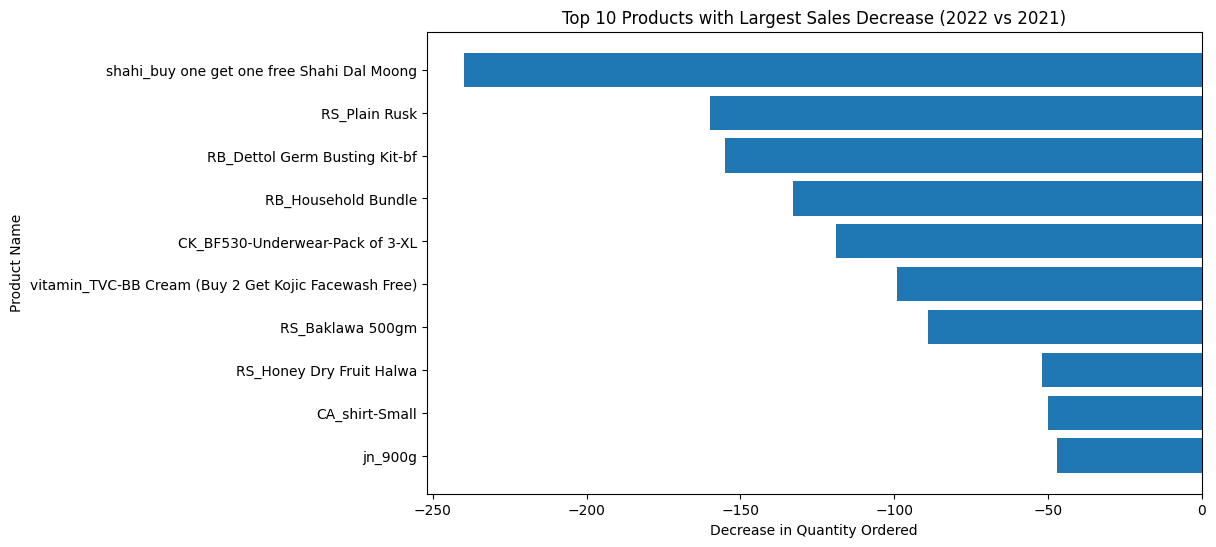

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("orders.csv")

df['order_date'] = pd.to_datetime(df['order_date'])
sales_2021 = df[df['order_date'].dt.year == 2021].groupby('sku_name', as_index=False)['qty_ordered'].sum()
sales_2022 = df[df['order_date'].dt.year == 2022].groupby('sku_name', as_index=False)['qty_ordered'].sum()

sales_2021.rename(columns={'qty_ordered': 'qty_2021'}, inplace=True)
sales_2022.rename(columns={'qty_ordered': 'qty_2022'}, inplace=True)

merged = pd.merge(sales_2021, sales_2022, on='sku_name', how='outer').fillna(0)
merged['difference'] = merged['qty_2022'] - merged['qty_2021']

top10_decrease = merged.sort_values(by='difference', ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10_decrease['sku_name'], top10_decrease['difference'])
plt.xlabel('Decrease in Quantity Ordered')
plt.ylabel('Product Name')
plt.title('Top 10 Products with Largest Sales Decrease (2022 vs 2021)')
plt.gca().invert_yaxis() 
plt.show()

# ✅ Save to CSV
top10_decrease.to_csv("Top10_Products_Decrease_2022vs2021.csv", index=False)
